In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def accurcy(y,y_hat):
    return np.mean(y==y_hat)

In [4]:
data=pd.read_csv('Cleaned_housing_data.csv')

In [5]:
data.shape

(4967, 16)

Lets take the numeric data and tun a correlation matrix.

In [6]:
df=data[['MLS','sold_price','zipcode','longitude','latitude','lot_acres','taxes','year_built','bedrooms','bathrooms','sqrt_ft','garage','fireplaces','HOA']] #,'zipcode']

In [7]:
corrMatrix=df.corr()

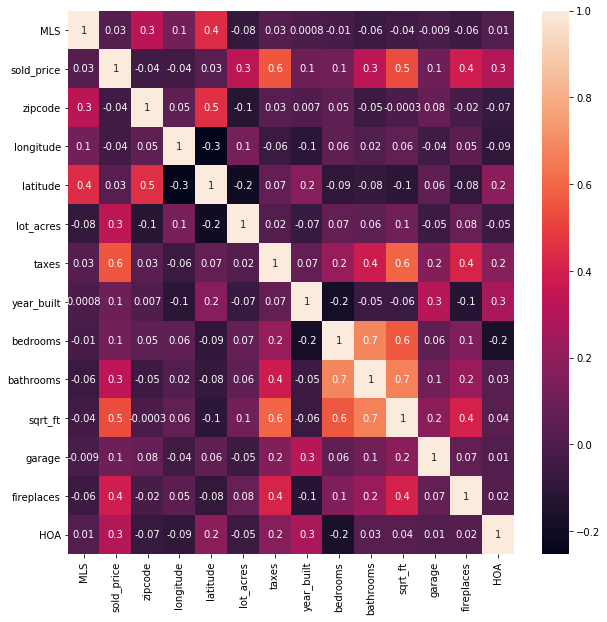

In [8]:
plt.figure(figsize=(10, 10))
ax=sns.heatmap(corrMatrix,annot=True,fmt=".1g")

From the correlation matrix we can see that some of the variables are not related with bedrooms. They are 'HOA','year_built','latitude','longitude','zipcode','MLS','lot_acres lets remove them.

In [9]:
data_S=data[['sold_price','taxes','bedrooms','bathrooms','sqrt_ft','garage','fireplaces']] #,'zipcode']

In [10]:
corrMatrix1=data_S.corr()

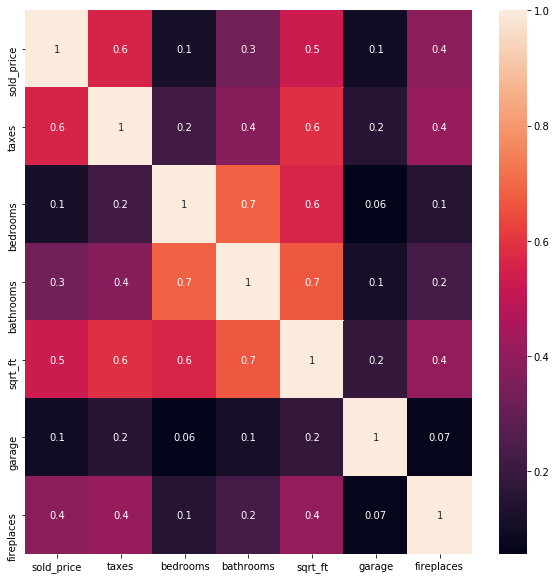

In [11]:
plt.figure(figsize=(10, 10))
ax=sns.heatmap(corrMatrix1,annot=True,fmt=".1g")

Lets take fraction of data for test set.

In [12]:
data_Tst = data_S.sample(frac=0.20)
data_Tst.shape

(993, 7)

In [13]:
data_Tst.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
1660,750000.0,7282.00,5,4.0,4254.0,3.0,3
3758,625000.0,6691.49,4,4.0,4401.0,5.0,3
1585,750000.0,5812.00,3,4.0,2860.0,2.0,1
2508,678200.0,8369.01,4,3.0,3356.0,3.0,2
3481,601250.0,5878.01,4,3.0,3310.0,3.0,3


Remove those rows and create the train dataset. 

In [14]:
data_train=data_S.drop(data_Tst.index)
data_train.shape

(3974, 7)

In [15]:
data_train.head(10)

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5
5,3250000.0,27802.84,3,4.0,6842.0,3.0,5
6,2400000.0,19038.42,9,8.0,12025.0,4.0,6
7,2500000.0,21646.00,6,8.0,8921.0,4.0,5
8,3700000.0,25094.39,5,7.0,5238.0,3.0,1
11,2050000.0,24353.00,5,6.0,7230.0,3.0,4


In [16]:
data_Train=data_train.reset_index(drop=True)

In [17]:
data_Train.head(12)

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5
5,3250000.0,27802.84,3,4.0,6842.0,3.0,5
6,2400000.0,19038.42,9,8.0,12025.0,4.0,6
7,2500000.0,21646.00,6,8.0,8921.0,4.0,5
8,3700000.0,25094.39,5,7.0,5238.0,3.0,1
9,2050000.0,24353.00,5,6.0,7230.0,3.0,4


## Lets look athe scatter plot

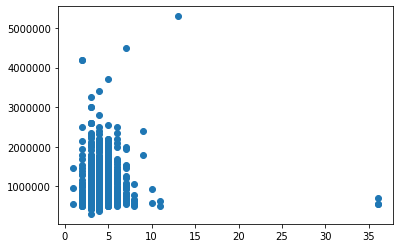

In [18]:
plt.scatter(data_Train['bedrooms'],data_Train['sold_price'])

# Categorize each variable
## Bedroom

In [19]:
data_Train['bedrooms'].max()

36

In [20]:
data_Train['bedrooms'].min()

1

Lets split the dataframe into 4 chunks based on the value of bedrooms column and create a new column based on bedroom group

In [96]:
print(data_Train[data_Train['bedrooms']<=3].shape)
print(data_Train[(data_Train['bedrooms']<=5) & (data_Train['bedrooms']>3)].shape)
print(data_Train[(data_Train['bedrooms']<=8) & (data_Train['bedrooms']>5)].shape)
print(data_Train[data_Train['bedrooms']>8].shape)

(1249, 14)
(2592, 14)
(123, 14)
(10, 14)


In [25]:
conditions = [
    (data_Train['bedrooms']<=3),
    (data_Train['bedrooms']<=5) & (data_Train['bedrooms']>3),
    (data_Train['bedrooms']<=8) & (data_Train['bedrooms']>5),
     (data_Train['bedrooms']>8),
    ]


In [26]:
values = [1, 2, 3,4]

In [27]:
data_Train['Bedroom_grp'] = np.select(conditions, values)

In [28]:
data_Train.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6,4
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5,1
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5,1
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4,3
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5,2


In [29]:
class KNNregression():
    def fit(self, X,y):
        self.X=X
        self.y=y
    def predict(self,X,K,epsilon=1e-3):
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1) 
            idxt=np.argsort(dist2)[:K]
            gamma_k=np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
            y_hat[i]=gamma_k.dot(self.y[idxt])
            
        return y_hat

In [30]:
data_Test=data_Tst.reset_index(drop=True)
data_Test.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
0,750000.0,7282.00,5,4.0,4254.0,3.0,3
1,625000.0,6691.49,4,4.0,4401.0,5.0,3
2,750000.0,5812.00,3,4.0,2860.0,2.0,1
3,678200.0,8369.01,4,3.0,3356.0,3.0,2
4,601250.0,5878.01,4,3.0,3310.0,3.0,3


In [31]:
X=data_Train['bedrooms'].to_numpy()
X.shape

(3974,)

In [32]:
X=X.reshape((3974,1))

In [33]:
y=data_Train['Bedroom_grp'].to_numpy()
y.shape

(3974,)

In [34]:
y=y.reshape((3974,1))

In [35]:
X_test=data_Test['bedrooms'].to_numpy()
X_test.shape

(993,)

In [36]:
X_test=X_test.reshape((993,1))

In [37]:
knn=KNNregression()

In [38]:
knn.fit(X,y)

In [39]:
y_hat=knn.predict(X_test,3,epsilon=1e-3)

## Bathroom 

In [40]:
print(data_Train['bathrooms'].max())
print(data_Train['bathrooms'].min())

36.0
1.0


In [41]:
print(data_Train[data_Train['bathrooms']<=2].shape)
print(data_Train[(data_Train['bathrooms']<=3) & (data_Train['bathrooms']>2)].shape)
print(data_Train[(data_Train['bathrooms']<=4) & (data_Train['bathrooms']>3)].shape)
print(data_Train[data_Train['bathrooms']>5].shape)

(150, 8)
(1585, 8)
(1484, 8)
(232, 8)


In [42]:
conditions_Br= [
    (data_Train['bathrooms']<=2),
    (data_Train['bathrooms']<=3) & (data_Train['bathrooms']>2),
    (data_Train['bathrooms']<=4) & (data_Train['bathrooms']>3),
     (data_Train['bathrooms']>5),
    ]

In [43]:
data_Train['Bathrooms_grp'] = np.select(conditions_Br, values)

In [44]:
data_Train.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp,Bathrooms_grp
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6,4,4
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5,1,1
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5,1,2
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4,3,0
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5,2,4


## Taxes

In [45]:
print(data_Train['taxes'].max())
print(data_Train['taxes'].min())

32442.22
1.0


In [46]:
print(data_Train[data_Train['taxes']<=5000].shape)
print(data_Train[(data_Train['taxes']<=8000) & (data_Train['taxes']>5000)].shape)
print(data_Train[(data_Train['taxes']<=12000) & (data_Train['taxes']>8000)].shape)
print(data_Train[data_Train['taxes']>12000].shape)

(1088, 9)
(1860, 9)
(745, 9)
(281, 9)


In [47]:
conditions_Tx = [
    (data_Train['taxes']<=5000),
    (data_Train['taxes']<=8000) & (data_Train['taxes']>5000),
    (data_Train['taxes']<=12000) & (data_Train['taxes']>8000),
     (data_Train['taxes']>12000),
    ]

In [48]:
data_Train['Tax_grp'] = np.select(conditions_Tx, values)
data_Train.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp,Bathrooms_grp,Tax_grp
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6,4,4,2
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5,1,1,3
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5,1,2,3
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4,3,0,3
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5,2,4,4


## Sqrt fit

In [49]:
print(data_Train['sqrt_ft'].max())
print(data_Train['sqrt_ft'].min())

22408.0
1100.0


In [50]:
print(data_Train[data_Train['sqrt_ft']<=2000].shape)
print(data_Train[(data_Train['sqrt_ft']<=3000) & (data_Train['sqrt_ft']>2000)].shape)
print(data_Train[(data_Train['sqrt_ft']<=4000) & (data_Train['sqrt_ft']>3000)].shape)
print(data_Train[data_Train['sqrt_ft']>3500].shape)

(24, 10)
(855, 10)
(1942, 10)
(2025, 10)


In [51]:
conditions_Sf = [
    (data_Train['sqrt_ft']<=2000),
    (data_Train['sqrt_ft']<=3000) & (data_Train['sqrt_ft']>2000),
    (data_Train['sqrt_ft']<=4000) & (data_Train['sqrt_ft']>3000),
     (data_Train['sqrt_ft']>3500),
    ]

In [52]:
data_Train['Sqrt_ft_grp'] = np.select(conditions_Sf, values)
data_Train.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp,Bathrooms_grp,Tax_grp,Sqrt_ft_grp
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6,4,4,2,4
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5,1,1,3,4
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5,1,2,3,3
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4,3,0,3,4
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5,2,4,4,4


## Garage

In [53]:
print(data_Train['garage'].max())
print(data_Train['garage'].min())

30.0
0.0


In [54]:
print(data_Train[data_Train['garage']<=2].shape)
print(data_Train[(data_Train['garage']<=3) & (data_Train['garage']>2)].shape)
print(data_Train[(data_Train['garage']<=4) & (data_Train['garage']>3)].shape)
print(data_Train[data_Train['garage']>4].shape)

(1241, 11)
(2268, 11)
(309, 11)
(156, 11)


In [55]:
conditions_Ga = [
    (data_Train['garage']<=2),
    (data_Train['garage']<=3) & (data_Train['garage']>2),
    (data_Train['garage']<=4) & (data_Train['garage']>3),
     (data_Train['garage']>4),
    ]

In [56]:
data_Train['Garage_grp'] = np.select(conditions_Ga, values)
data_Train.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp,Bathrooms_grp,Tax_grp,Sqrt_ft_grp,Garage_grp
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6,4,4,2,4,1
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5,1,1,3,4,1
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5,1,2,3,3,2
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4,3,0,3,4,3
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5,2,4,4,4,2


## Sold prices 

In [57]:
print(data_Train['sold_price'].max())
print(data_Train['sold_price'].min())

5300000.0
300000.0


In [58]:
print(data_Train[data_Train['sold_price']<=500000].shape)
print(data_Train[(data_Train['sold_price']<=700000) & (data_Train['sold_price']>500000)].shape)
print(data_Train[(data_Train['sold_price']<=1000000) & (data_Train['sold_price']>700000)].shape)
print(data_Train[data_Train['sold_price']>1000000].shape)

(48, 12)
(2190, 12)
(1188, 12)
(548, 12)


In [59]:
conditions_SP = [
    (data_Train['sold_price']<=500000),
    (data_Train['sold_price']<=700000) & (data_Train['sold_price']>500000),
    (data_Train['sold_price']<=1000000) & (data_Train['sold_price']>700000),
     (data_Train['sold_price']>1000000),
    ]

In [60]:
data_Train['Sold_price_grp'] = np.select(conditions_SP, values)
data_Train.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp,Bathrooms_grp,Tax_grp,Sqrt_ft_grp,Garage_grp,Sold_price_grp
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6,4,4,2,4,1,4
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5,1,1,3,4,1,4
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5,1,2,3,3,2,4
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4,3,0,3,4,3,4
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5,2,4,4,4,2,4


## Fireplaces

In [61]:
print(data_Train['fireplaces'].max())
print(data_Train['fireplaces'].min())

9
0


In [62]:
print(data_Train[data_Train['fireplaces']<=1].shape)
print(data_Train[(data_Train['fireplaces']<=2) & (data_Train['fireplaces']>1)].shape)
print(data_Train[(data_Train['fireplaces']<=3) & (data_Train['fireplaces']>2)].shape)
print(data_Train[data_Train['fireplaces']>3].shape)

(1679, 13)
(1305, 13)
(658, 13)
(332, 13)


In [63]:
conditions_FP = [
    (data_Train['fireplaces']<=1),
    (data_Train['fireplaces']<=2) & (data_Train['fireplaces']>1),
    (data_Train['fireplaces']<=3) & (data_Train['fireplaces']>2),
     (data_Train['fireplaces']>3),
    ]

In [64]:
data_Train['fireplaces_grp'] = np.select(conditions_SP, values)
data_Train.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp,Bathrooms_grp,Tax_grp,Sqrt_ft_grp,Garage_grp,Sold_price_grp,fireplaces_grp
0,5300000.0,5272.00,13,10.0,10500.0,0.0,6,4,4,2,4,1,4,4
1,4200000.0,10422.36,2,2.0,7300.0,0.0,5,1,1,3,4,1,4,4
2,4200000.0,10482.00,2,3.0,3508.0,3.0,5,1,2,3,3,2,4,4
3,4500000.0,8418.58,7,5.0,9019.0,4.0,4,3,0,3,4,3,4,4
4,3411450.0,15393.00,4,6.0,6396.0,3.0,5,2,4,4,4,2,4,4


New train dataset with the categorized variable only

In [65]:
Data_TR_catV=data_Train[['Sold_price_grp','Bathrooms_grp','Tax_grp','Sqrt_ft_grp','Garage_grp','fireplaces_grp','bedrooms','Bedroom_grp']]
Data_TR_catV.head()

,Sold_price_grp,Bathrooms_grp,Tax_grp,Sqrt_ft_grp,Garage_grp,fireplaces_grp,bedrooms,Bedroom_grp
0,4,4,2,4,1,4,13,4
1,4,1,3,4,1,4,2,1
2,4,2,3,3,2,4,2,1
3,4,0,3,4,3,4,7,3
4,4,4,4,4,2,4,4,2


## Test Set

In [67]:
data_Tst=data_Tst.reset_index(drop=True)
data_Tst.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
0,750000.0,7282.00,5,4.0,4254.0,3.0,3
1,625000.0,6691.49,4,4.0,4401.0,5.0,3
2,750000.0,5812.00,3,4.0,2860.0,2.0,1
3,678200.0,8369.01,4,3.0,3356.0,3.0,2
4,601250.0,5878.01,4,3.0,3310.0,3.0,3


In [68]:
conditions_Tst= [
    (data_Tst['bedrooms']<=3),
    (data_Tst['bedrooms']<=5) & (data_Tst['bedrooms']>3),
    (data_Tst['bedrooms']<=8) & (data_Tst['bedrooms']>5),
     (data_Tst['bedrooms']>8),
    ]

In [69]:
data_Tst['Bedroom_grp'] = np.select(conditions_Tst, values)
data_Tst.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp
0,750000.0,7282.00,5,4.0,4254.0,3.0,3,2
1,625000.0,6691.49,4,4.0,4401.0,5.0,3,2
2,750000.0,5812.00,3,4.0,2860.0,2.0,1,1
3,678200.0,8369.01,4,3.0,3356.0,3.0,2,2
4,601250.0,5878.01,4,3.0,3310.0,3.0,3,2


In [70]:
conditions_Tst_SP= [
    (data_Tst['sold_price']<=500000),
    (data_Tst['sold_price']<=700000) & (data_Tst['sold_price']>500000),
    (data_Tst['sold_price']<=1000000) & (data_Tst['sold_price']>700000),
     (data_Tst['sold_price']>1000000),
    ]

In [71]:
data_Tst['Sold_price_grp'] = np.select(conditions_Tst_SP, values)
data_Tst.head()

,sold_price,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,Bedroom_grp,Sold_price_grp
0,750000.0,7282.00,5,4.0,4254.0,3.0,3,2,3
1,625000.0,6691.49,4,4.0,4401.0,5.0,3,2,2
2,750000.0,5812.00,3,4.0,2860.0,2.0,1,1,3
3,678200.0,8369.01,4,3.0,3356.0,3.0,2,2,2
4,601250.0,5878.01,4,3.0,3310.0,3.0,3,2,2


# Apply KNN to find out the categorized variables for the test set

### Find the bathroom variables

In [72]:
X=Data_TR_catV[['bedrooms','Bedroom_grp']].to_numpy()
print(X.shape)
X=X.reshape((3974,2))
y=Data_TR_catV['Bathrooms_grp'].to_numpy()
print(y.shape)
y=y.reshape((3974,1))
X_test=data_Tst[['bedrooms','Bedroom_grp']].to_numpy()
print(X_test.shape)

(3974, 2)
(3974,)
(993, 2)


In [73]:
knn.fit(X,y)

In [74]:
y_Bathrooms_grp=knn.predict(X_test,3,epsilon=1e-3)
y_Bathrooms_grp.shape

(993,)

In [75]:
y_Bathrooms_grp=(y_Bathrooms_grp.round()).reshape((993,1))
y_Bathrooms_grp.shape

(993, 1)

### Find the Sqrt_ft_grp variables

In [76]:
X=Data_TR_catV[['bedrooms','Bedroom_grp']].to_numpy()
print(X.shape)
X=X.reshape((3974,2))
y=Data_TR_catV['Sqrt_ft_grp'].to_numpy()
print(y.shape)
y=y.reshape((3974,1))
X_test=data_Tst[['bedrooms','Bedroom_grp']].to_numpy()
print(X_test.shape)

(3974, 2)
(3974,)
(993, 2)


In [77]:
knn.fit(X,y)

In [78]:
y_Sqrt_ft_grp=knn.predict(X_test,3,epsilon=1e-3)
y_Sqrt_ft_grp.shape

(993,)

In [79]:
y_Sqrt_ft_grp=(y_Sqrt_ft_grp.round()).reshape((993,1))
y_Sqrt_ft_grp.shape

(993, 1)

### Find the Tax_grp variables

In [80]:
y=Data_TR_catV['Tax_grp'].to_numpy()
print(y.shape)
y=y.reshape((3974,1))
knn.fit(X,y)
y_Tax_grp=knn.predict(X_test,3,epsilon=1e-3)
print(y_Tax_grp.shape)
y_Tax_grp=(y_Tax_grp.round()).reshape((993,1))
y_Tax_grp.shape

(3974,)
(993,)


(993, 1)

### Find the fireplaces_grp variables

In [81]:
y=Data_TR_catV['fireplaces_grp'].to_numpy()
print(y.shape)
y=y.reshape((3974,1))
knn.fit(X,y)
y_fireplaces_grp=knn.predict(X_test,3,epsilon=1e-3)
print(y_fireplaces_grp.shape)
y_fireplaces_grp=(y_fireplaces_grp.round()).reshape((993,1))
y_fireplaces_grp.shape

(3974,)
(993,)


(993, 1)

### Find the Garage_grp variables

In [82]:
y=Data_TR_catV['Garage_grp'].to_numpy()
print(y.shape)
y=y.reshape((3974,1))
knn.fit(X,y)
y_Garage_grp=knn.predict(X_test,3,epsilon=1e-3)
print(y_Garage_grp.shape)
y_Garage_grp=(y_Garage_grp.round()).reshape((993,1))
y_Garage_grp

(3974,)
(993,)


array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

Now use the linear regression for each group of data

## Regression

In [83]:
def OLS(Y,Y_hat,N):
    return (1/(2*N)*np.sum((Y-Y_hat)**2))
def R2(Y,Y_hat):
    return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

class OURLinearRegression():
    
    def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False, lambd = 0, p = 1):
        epochs = int(epochs)
        N, D = X.shape
        Y = y
        
        self.W = np.random.randn(D)
        
        J = np.zeros(epochs)
        
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat, N)  #(lambd/p*N)*np.linalg.norm(self.W, ord=p, keepdims=True)
            self.W -= eta*(1/N)*(X.T@(Y_hat - Y)) # (1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))
                    
         
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()        
    def predict(self, X):
        return X @ self.W

In [84]:
#['Sold_price_grp','Bathrooms_grp','Tax_grp','Sqrt_ft_grp','Garage_grp','fireplaces_grp','bedrooms','Bedroom_grp']]
Data_TR_catV.head()

,Sold_price_grp,Bathrooms_grp,Tax_grp,Sqrt_ft_grp,Garage_grp,fireplaces_grp,bedrooms,Bedroom_grp
0,4,4,2,4,1,4,13,4
1,4,1,3,4,1,4,2,1
2,4,2,3,3,2,4,2,1
3,4,0,3,4,3,4,7,3
4,4,4,4,4,2,4,4,2


In [85]:
X_other=np.concatenate((y_Bathrooms_grp,y_Tax_grp, y_Sqrt_ft_grp,y_Garage_grp,y_fireplaces_grp,X_test),axis=1)


In [86]:
X_other.shape

(993, 7)

In [87]:
myReg=OURLinearRegression()

In [88]:
X=Data_TR_catV[['Bathrooms_grp','Tax_grp','Sqrt_ft_grp','Garage_grp','fireplaces_grp','bedrooms','Bedroom_grp']].to_numpy()

In [89]:
y=Data_TR_catV['Sold_price_grp'].to_numpy()
y

array([4, 4, 4, ..., 2, 2, 1])

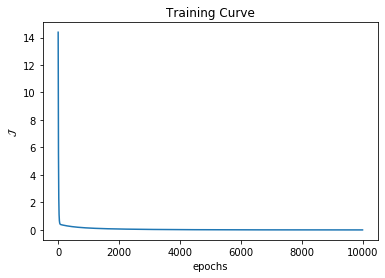

In [90]:
myReg.fit(X,y,epochs=1e4,eta=1e-3,show_curve=True )

In [91]:
y_HAT=myReg.predict(X_other)
y_HAT.shape

(993,)

In [92]:
(y_HAT.round()).max()

4.0

In [93]:
(y_HAT.round()).min()

2.0

In [94]:
y_original=data_Tst['Sold_price_grp'].to_numpy()
#y_original

In [95]:
accurcy(y_original,(y_HAT.round()))

0.5438066465256798